# <u> Covid-19 Data Exploration </u>

## <u> Objective: </u> 
### Assess the Quality of the *Case Numbers* Statistic to control response measures.
Define ultimate goal of response measures as prevention of maxing out ICU capacities.\
Thus, investigate whether there exist scenarios in which an increase in the hospital admissions was not indicated
by an increase in case numbers.
Furthermore, investigate beahviour of hospital admissions and deaths after substantial increase in testing.

## <u> Method: </u>
1. Get an Overview over Hospital Admission Data
2. Correlate Case Number Data with Testing Strategy
3. Combine Observations from (1) and (2)

In [2]:
import os
import wget
import pandas as pd
import matplotlib.pyplot as plt

## Download and Load all Data Sets

In [5]:
# create data directory if it doesnt exist yet
if not 'data' in os.listdir():
    ! mkdir data

data_dir = './data/'

# clean data dir from old data (some sets are updated on a daily bases)
! rm data/*


# add urls to data file for new data sources here

# From European Centre for Disease Prevention and Control:
cases_deaths_url = 'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv'
hospitalization_url = 'https://opendata.ecdc.europa.eu/covid19/hospitalicuadmissionrates/csv/data.csv'
tests_url = 'https://opendata.ecdc.europa.eu/covid19/testing/csv/data.csv'
variants_url = 'https://opendata.ecdc.europa.eu/covid19/virusvariant/csv/data.csv'
vaccinations_url = 'https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv'

# add them to the dictionary and specify the desired file name
download_dict = {'cases_deaths.csv': cases_deaths_url, 'hospitalizations.csv': hospitalization_url,
                'tests.csv': tests_url, 'vaccinations.csv': vaccinations_url, 'variants.csv': variants_url}

for dict_item in download_dict.items():
    # download data file
    wget.download(dict_item[1], data_dir + dict_item[0])
    # load data frame named by filename
    df_name = dict_item[0].split('.')[0]
    globals()[df_name] = pd.read_csv(data_dir + str(dict_item[0])) # use string as variable name

In [6]:
print('Loaded: \n')
for filename in download_dict.keys():
    print(filename + ', with variables:' + '\n')
    print(globals()[filename.split('.')[0]].columns.values, '\n \n')

Loaded: 

cases_deaths.csv, with variables:

['dateRep' 'day' 'month' 'year' 'cases' 'deaths' 'countriesAndTerritories'
 'geoId' 'countryterritoryCode' 'popData2020' 'continentExp'] 
 

hospitalizations.csv, with variables:

['country' 'indicator' 'date' 'year_week' 'value' 'source' 'url'] 
 

tests, with variables:

['country' 'country_code' 'year_week' 'level' 'region' 'region_name'
 'new_cases' 'tests_done' 'population' 'testing_rate' 'positivity_rate'
 'testing_data_source'] 
 

vaccinations, with variables:

['YearWeekISO' 'FirstDose' 'FirstDoseRefused' 'SecondDose' 'UnknownDose'
 'NumberDosesReceived' 'Region' 'Population' 'ReportingCountry'
 'TargetGroup' 'Vaccine' 'Denominator'] 
 

variants, with variables:

['country' 'country_code' 'year_week' 'source' 'new_cases'
 'number_sequenced' 'percent_cases_sequenced' 'valid_denominator'
 'variant' 'number_detections_variant' 'percent_variant'] 
 



In [14]:
for filename in download_dict.keys():
    print(filename + ':' + '\n')
    print(globals()[filename.split('.')[0]].describe(), '\n')

cases_deaths.csv:

               day        month    year         cases        deaths  \
count  4620.000000  4620.000000  4620.0  4.620000e+03   4620.000000   
mean     15.713636     5.018182  2021.0  7.535879e+03    161.201299   
std       8.886844     1.434767     0.0  1.003395e+05   2597.746064   
min       1.000000     2.000000  2021.0 -2.001000e+03     -3.000000   
25%       8.000000     4.000000  2021.0  1.180000e+02      0.000000   
50%      16.000000     5.000000  2021.0  5.465000e+02      6.000000   
75%      23.000000     6.000000  2021.0  2.402250e+03     34.000000   
max      31.000000     8.000000  2021.0  3.645305e+06  97699.000000   

        popData2020  
count  4.620000e+03  
mean   1.510301e+07  
std    2.121677e+07  
min    3.874700e+04  
25%    2.095861e+06  
50%    6.387122e+06  
75%    1.152244e+07  
max    8.316671e+07   

hospitalizations.csv:

              value
count  23061.000000
mean    1695.063662
std     4765.707913
min        0.000000
25%       20.00000

## Overview over ECDPC Hospital Admission Data

In [26]:
hospitalizations.info()
hosp_indicators = hospitalizations.indicator.unique()
print('\n \n More specifically, we have data on: \n', hospitalizations.indicator.unique())

# isolate weekly icu admissions per 100k
hosp_by_indicator = hospitalizations.groupby('indicator')
weekly_icu = hosp_by_indicator.get_group(hosp_indicators[-1])

weekly_icu.info
# join weekly_icu with testing data set
# weekly_icu.join(tests, on='year_week')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23061 entries, 0 to 23060
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    23061 non-null  object 
 1   indicator  23061 non-null  object 
 2   date       23061 non-null  object 
 3   year_week  23061 non-null  object 
 4   value      23061 non-null  float64
 5   source     23061 non-null  object 
 6   url        20402 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB

 
 More specifically, we have data on: 
 ['Daily hospital occupancy' 'Daily ICU occupancy'
 'Weekly new hospital admissions per 100k'
 'Weekly new ICU admissions per 100k']


<bound method DataFrame.info of       country                           indicator        date year_week  \
4581   Cyprus  Weekly new ICU admissions per 100k  2020-03-22  2020-W12   
4582   Cyprus  Weekly new ICU admissions per 100k  2020-03-29  2020-W13   
4583   Cyprus  Weekly new ICU admissions per 100k  2020-04-05  2020-W14   
4584   Cyprus  Weekly new ICU admissions per 100k  2020-04-12  2020-W15   
4585   Cyprus  Weekly new ICU admissions per 100k  2020-04-19  2020-W16   
...       ...                                 ...         ...       ...   
23056  Sweden  Weekly new ICU admissions per 100k  2021-06-27  2021-W25   
23057  Sweden  Weekly new ICU admissions per 100k  2021-07-04  2021-W26   
23058  Sweden  Weekly new ICU admissions per 100k  2021-07-11  2021-W27   
23059  Sweden  Weekly new ICU admissions per 100k  2021-07-18  2021-W28   
23060  Sweden  Weekly new ICU admissions per 100k  2021-07-25  2021-W29   

          value                               source  url  
4581   

In [6]:
# ICU-Data for how many and which countries?
countries = hospitalizations.country.unique()
icu_countries = weekly_icu.country.unique()
print('No. Countries Appearing in the Hospitalization Data Set:', len(countries), '\n \n', countries)
print('\n \n No. Countries with weekly ICU admission Data:', len(icu_countries), '\n \n', icu_countries)

No. Countries Appearing in the Data Set: 29 
 
 ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Slovakia' 'Slovenia' 'Spain'
 'Sweden']

 
 No. Countries with weekly ICU admission Data: 14 
 
 ['Cyprus' 'Czechia' 'Estonia' 'France' 'Greece' 'Ireland' 'Latvia'
 'Lithuania' 'Malta' 'Netherlands' 'Norway' 'Slovenia' 'Spain' 'Sweden']


In [28]:
# Join Case Number Data with ICU Data
# join column 'cases' from cases_deaths to weekly_icu
# merge by year_week


cases_deaths.info
# cases_deaths['countriesAndTerritories'].unique()
# cases_by_country = cases_deaths.groupby('countriesAndTerritories')

<bound method DataFrame.info of          dateRep  day  month  year   cases  deaths countriesAndTerritories  \
0     01/08/2021    1      8  2021     593       0                 Austria   
1     31/07/2021   31      7  2021     517       0                 Austria   
2     30/07/2021   30      7  2021     495       1                 Austria   
3     29/07/2021   29      7  2021     528       3                 Austria   
4     28/07/2021   28      7  2021     404       4                 Austria   
...          ...  ...    ...   ...     ...     ...                     ...   
4615  05/03/2021    5      3  2021    4069      14                  Sweden   
4616  04/03/2021    4      3  2021    4884      19                  Sweden   
4617  03/03/2021    3      3  2021    4875      19                  Sweden   
4618  02/03/2021    2      3  2021    6191      23                  Sweden   
4619  01/03/2021    1      3  2021  668980   13080                  Sweden   

     geoId countryterritoryCode

country
Cyprus         AxesSubplot(0.125,0.125;0.775x0.755)
Czechia        AxesSubplot(0.125,0.125;0.775x0.755)
Estonia        AxesSubplot(0.125,0.125;0.775x0.755)
France         AxesSubplot(0.125,0.125;0.775x0.755)
Greece         AxesSubplot(0.125,0.125;0.775x0.755)
Ireland        AxesSubplot(0.125,0.125;0.775x0.755)
Latvia         AxesSubplot(0.125,0.125;0.775x0.755)
Lithuania      AxesSubplot(0.125,0.125;0.775x0.755)
Malta          AxesSubplot(0.125,0.125;0.775x0.755)
Netherlands    AxesSubplot(0.125,0.125;0.775x0.755)
Norway         AxesSubplot(0.125,0.125;0.775x0.755)
Slovenia       AxesSubplot(0.125,0.125;0.775x0.755)
Spain          AxesSubplot(0.125,0.125;0.775x0.755)
Sweden         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

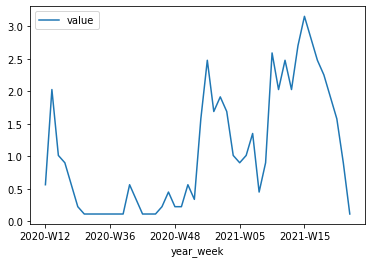

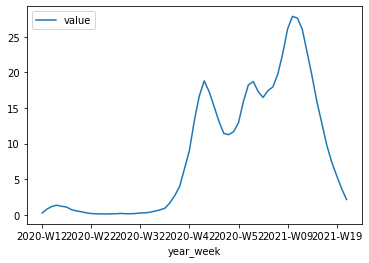

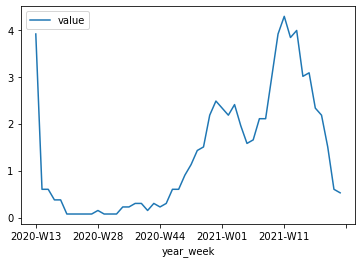

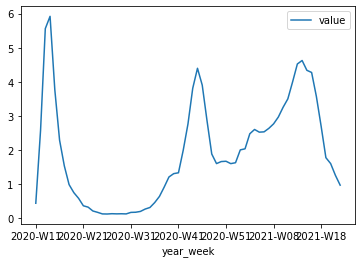

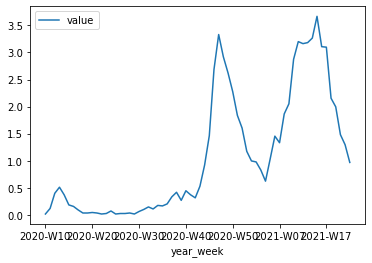

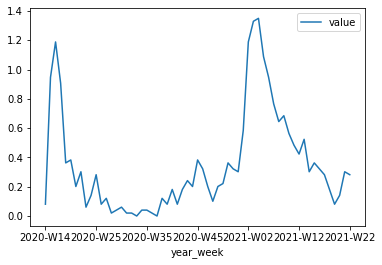

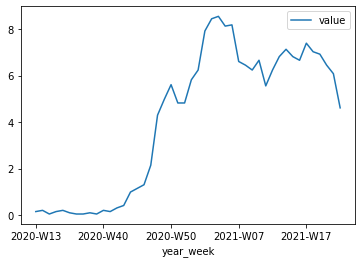

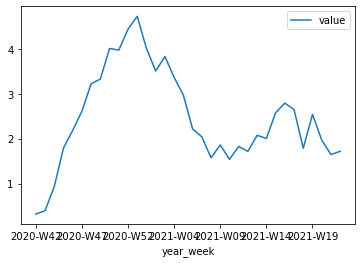

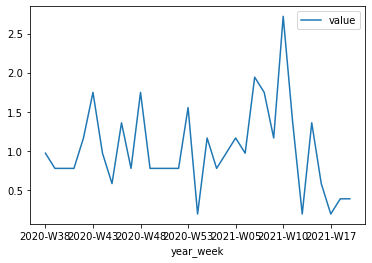

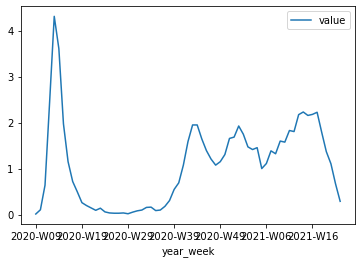

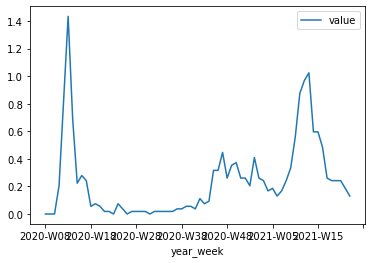

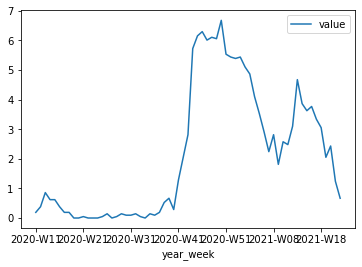

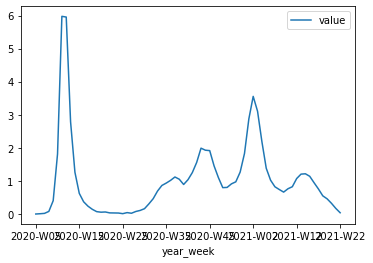

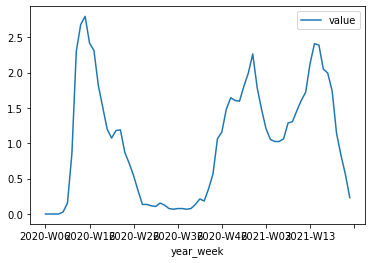

In [7]:
# Visualize weekly ICU admissions per 100k for all countries with new_cases
icu_by_country = weekly_icu[['value', 'country', 'year_week']].groupby('country')


#for country in icu_countries:
#    icu_df = icu_by_country.get_group(country)
    
icu_by_country.plot(kind='line', x='year_week', y='value') # group as title?

In [ ]:
# Develop Visualization which reveals Case Numbers per 100k, Deaths and ICU Admissions

# Look at Germany
germany_hosp = hosp_by_country.get_group('Germany')
germany_hosp.head()
# Add Case Numbers to df



In [ ]:
cases_by_country = cases_deaths.groupby('countriesAndTerritories')

## <u> More Ideas: </u>
1.  <b> Hypothesis: </b> Vaccinating the Old already contributed a lot to relieve the hospitals (since serious cases were mostly among the elderly)\
$\rightarrow$ If this was true we'd observe: *Normal* spreading, i.e. no anomalies in positive test rates, but decreasing fatalities/ hospitalizations\
2. <b> Hypothesis: </b> The Nightly Movement Restrictions (don't) help to mitigate spreading.\
$\rightarrow$ Are there Compareable Bundesländer and or countries with and without nightly movement restrictions

## Literature Research on: How long does it take for the lockdown to show effects?

Timing of utmost importance: https://www.embopress.org/doi/full/10.15252/emmm.202013171.
More important than strictness or duration.

Lockdown starts to reduce the number of COVID-19 infections around 10 days after implementation.
https://link.springer.com/content/pdf/10.1007/s40258-020-00596-3.pdf

### General Notes:

* <u> Hospitalization </u> not a real-time indicator, since dev of symptoms/ pos. test to hosp takes 10 days
* <u> Case Numbers </u> shall be split up by age. More infections for old people --> pandemic more severe
* $\implies$ Test-Strategy Corrected Case Numbers remain the day to day indicator of pandemic dynamics while hospitalization parameters always need to be accounted for. The legislation must allow for severe lockdown measures when hospital parameters are on alert.

* Transfers from regular hospital beds to ICU. During the first wave in Germany about 14% got transferred. Supposedly lower nowerdays.

* Monitor vaccination efficiency through share of vaccinated among all ICU patients